(100, 120) 50


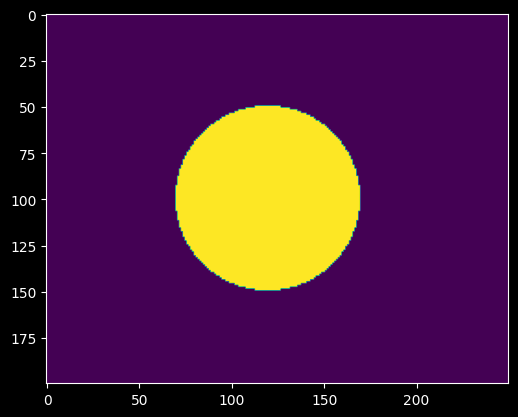

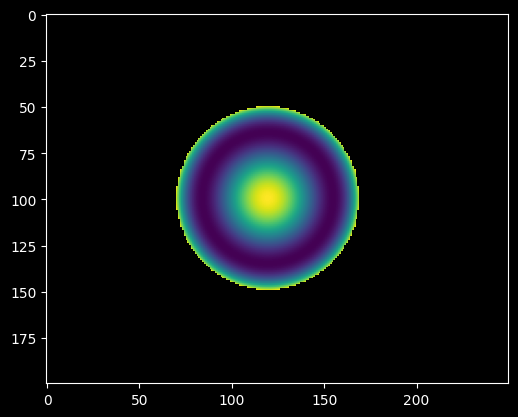

In [132]:
import matplotlib.pyplot as plt
from arte.types.mask import CircularMask
from arte.utils.zernike_generator import ZernikeGenerator
import numpy as np
cm = CircularMask((200,250),50,(100,120))
plt.figure()
plt.imshow(cm.mask()* -1 +1)
nzern = 36
zz = ZernikeGenerator(cm)
print(zz.center(), zz.radius())
zern_cube = np.rollaxis(np.ma.masked_array([zz.getZernike(n) for n in range(1,nzern+1)]),0,3)
plt.figure()
plt.imshow(zern_cube[:,:,10])

In [133]:
c_wf = np.random.rand(nzern)
wf =  np.ma.masked_array(zern_cube @ c_wf, mask=cm.mask())
zern_cube_compressed = np.array([zern_cube[:,:,n].compressed() for n in range(0,nzern)]).T
zrec = np.linalg.pinv(zern_cube_compressed)
coeffs = zrec @ wf.compressed()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs-c_wf)**2)/len(coeffs)))


Normalized RMS: 1.51038e-15 


In [143]:
from arte.utils.modal_decomposer import ModalDecomposer
from arte.types.wavefront import Wavefront

#cm_ma = np.ma.masked_array(np.ones((200,250)),mask=cm.mask())
#cmask = CircularMask.fromMaskedArray(cm_ma)

nzern2fit = 36
mdc = ModalDecomposer(nzern2fit)
coeffs2 = mdc.measureZernikeCoefficientsFromWavefront(Wavefront(wf.data), cm, cm).toNumpyArray()
print("Normalized RMS: %g " % np.sqrt(np.sum((coeffs2-c_wf)**2)/len(coeffs)))

Normalized RMS: 0.333598 


In [148]:
list(range(2,2+36))

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [146]:
coeffs2

array([ 6.93994612e-01,  9.34370758e-01,  7.76338264e-01,  6.63544454e-01,
        2.08006929e-01,  2.94171577e-01,  9.74106623e-01,  5.54296501e-01,
        2.50407763e-01,  5.17233429e-01,  2.64437693e-01,  4.66835440e-01,
        4.93580222e-01,  8.15315956e-01,  3.86205536e-01,  1.43125248e-01,
        6.39933263e-01,  8.13574439e-01,  6.48924675e-01,  6.67014074e-01,
        5.87306397e-01,  5.13806770e-01,  9.28100768e-01,  6.24947157e-01,
        5.90116064e-01,  8.43858989e-01,  8.98945565e-01,  8.56950573e-01,
        4.26550916e-01,  6.04868880e-01,  9.52625132e-01,  4.82559585e-01,
        3.84090047e-02,  5.99409431e-01,  5.47161707e-02, -9.51093753e-06])